<a href="https://colab.research.google.com/github/Wondupper/KNN_Food/blob/main/%D0%95%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ABBREV_with_CLASS.xlsx to ABBREV_with_CLASS.xlsx
Saving ABBREV.xlsx to ABBREV.xlsx


1) Изучите полученный набор данных

Анализ первого датасета

In [ ]:
data = pd.read_excel("ABBREV.xlsx")

In [ ]:
numeric = [col for col in data.columns if data[col].dtypes in ['int64', 'float64']]
categorial = [col for col in data.columns if data[col].dtypes in ['object']]

num_data = data[numeric]
cat_data = data[categorial]

In [ ]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [ ]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Shrt_Desc   8790 non-null   object
 1   GmWt_Desc1  8491 non-null   object
 2   GmWt_Desc2  4825 non-null   object
dtypes: object(3)
memory usage: 206.1+ KB


In [ ]:
with pd.option_context('display.max_columns', 50):
  print(num_data.describe())

             NDB_No    Water_(g)   Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
count   8790.000000  8789.000000  8790.000000  8790.000000    8790.000000   
mean   15663.495222    54.112218   226.317634    11.342849      10.553725   
std     9251.413586    30.772854   169.877539    10.530474      15.814842   
min     1001.000000     0.000000     0.000000     0.000000       0.000000   
25%     9086.250000    29.700000    91.000000     2.380000       0.950000   
50%    14427.500000    63.080000   191.000000     8.000000       5.140000   
75%    20142.750000    77.960000   337.000000    19.880000      13.720000   
max    93600.000000   100.000000   902.000000    88.320000     100.000000   

           Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  \
count  8465.000000     8790.000000   8196.000000    6958.000000   8442.000000   
mean      1.783468       22.127710      2.187445       8.543066     76.738214   
std       3.004609       27.270822      4.383138      14.923626

In [ ]:
cat_data.describe()

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",3 oz,1 cup
freq,2,1409,298


1) Придумайте способ осмысленного разбиения этих данных на несколько классов. Создайте новый столбец CLASS и поместите в него метки классов. Визуализируйте выполненное разбиение. Следующие действия выполняются над тремя версиями таблицы: а) ваш вариант б) разбиение одногруппника в) таблица с метками классов из файла в этом задании.

Перый вариант классификации - по витаминам. Посчитаем среднее количество витаминов в еде и разделим все продукты на больше меньше среднего.

Для начала переименуем колонки. В них есть буквы не из английского алфавита.

In [ ]:
data.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_µg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_µg', 'Food_Folate_(µg)':'Food_Folate_µg',
                       'Folate_DFE_(µg)':'Folate_DFE_µg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_µg', 'Vit_B12_(µg)':'Vit_B12_µg',
                       'Retinol_(µg)':'Retinol_µg', 'Alpha_Carot_(µg)':'Alpha_Carot_µg', 'Beta_Carot_(µg)':'Beta_Carot_µg', 'Vit_B12_(µg)':'Vit_B12_µg', 'Beta_Crypt_(µg)':'Beta_Crypt_µg',
                       'Lycopene_(µg)':'Lycopene_µg', 'Lut+Zea_ (µg)':'Lut+Zea_µg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_µg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg',
                       }, inplace = True )
num_data.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_mg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_mg', 'Food_Folate_(µg)':'Food_Folate_mg',
                       'Folate_DFE_(µg)':'Folate_DFE_mg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_mg', 'Vit_B12_(µg)':'Vit_B12_mg',
                       'Retinol_(µg)':'Retinol_mg', 'Alpha_Carot_(µg)':'Alpha_Carot_mg', 'Beta_Carot_(µg)':'Beta_Carot_mg', 'Vit_B12_(µg)':'Vit_B12_mg', 'Beta_Crypt_(µg)':'Beta_Crypt_mg',
                       'Lycopene_(µg)':'Lycopene_mg', 'Lut+Zea_ (µg)':'Lut_Zea_mg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_mg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg', 'Vit_D_µg' : 'Vit_D_mg',
                       }, inplace = True )
num_data = num_data.drop(columns = ['NDB_No'])

<ipython-input-10-9db37b96f01c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',


1.1) выполните минимальные необходимые манипуляции (обработайте категориальные признаки и пропуски) (Первый датасет)

In [ ]:
num_data.isnull().sum()

Water_g              1
Energ_Kcal           0
Protein_g            0
Lipid_Tot_g          0
Ash_g              325
Carbohydrt_g         0
Fiber_TD_g         594
Sugar_Tot_g       1832
Calcium_mg         348
Iron_mg            144
Magnesium_mg       739
Phosphorus_mg      579
Potassium_mg       426
Sodium_mg           83
Zinc_mg            706
Copper_mg         1257
Manganese_mg      2160
Selenium_mg       1700
Vit_C_mg           818
Thiamin_mg         634
Riboflavin_mg      616
Niacin_mg          637
Panto_Acid_mg     2242
Vit_B6_mg          905
Folate_Tot_mg     1261
Folic_Acid_mg     2039
Food_Folate_mg    1768
Folate_DFE_mg     2057
Choline_Tot_mg    4016
Vit_B12_mg        1193
Vit_A_IU           711
Vit_A_RAE         1535
Retinol_mg        1806
Alpha_Carot_mg    3258
Beta_Carot_mg     3162
Beta_Crypt_mg     3270
Lycopene_mg       3292
Lut_Zea_mg        3315
Vit_E_mg          2889
Vit_D_mg          3262
Vit_D_IU          3211
Vit_K_mg          3563
FA_Sat_g           349
FA_Mono_g  

In [ ]:
num_data.fillna(num_data.median(),inplace=True)

Порог витаминов

In [ ]:
srz = (8.372082 + 0.276959 + 1.236056 + 678.881342 + 92.913879 + 0.992490 + 0.364300 + 14.591809 + 9.943925) // 9

In [ ]:
for i, row in num_data.iterrows():
  if row['Vit_C_mg'] + row['Vit_B6_mg'] + row['Vit_B12_mg'] + row['Vit_A_IU'] + row['Vit_A_RAE'] + row['Vit_E_mg'] + row['Vit_D_mg'] + row['Vit_D_IU'] + row['Vit_K_mg'] > srz:
    num_data.at[i, 'CLASS'] = 1
  else:
    num_data.at[i, 'CLASS'] = 2

<Axes: xlabel='CLASS', ylabel='count'>

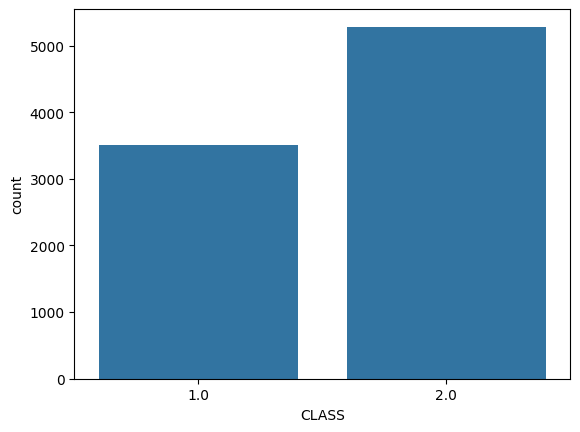

In [ ]:
sns.countplot(x = num_data['CLASS'])

1.2) отделите столбец с меткой CLASS (Первый датасет)

In [ ]:
CLASS = num_data['CLASS'].squeeze()
num_data = num_data.drop(['CLASS'], axis = 1)

1.3) разбейте данные на тренировочный и тестовый наборы. (Первый датасет)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data, CLASS, test_size = 0.3, random_state = 42)

2) Обучите классификатор KNeighborsClassifier на тренировочном наборе.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_n = KNeighborsClassifier()
knn_n.fit(X_train, y_train)
knn_n.score(X_test, y_test)

0.9355328024270004

3) Используйте обученную модель на тестовых данных, оцените полученные результаты. Используйте визуализацию и несколько метрик.

In [ ]:
#Тренировочный набор
from sklearn.metrics import classification_report
y_pred = knn_n.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.90      0.94      2427
         2.0       0.94      0.99      0.97      3726

    accuracy                           0.96      6153
   macro avg       0.96      0.95      0.95      6153
weighted avg       0.96      0.96      0.96      6153



In [ ]:
#Тестовый набор
y_pred = knn_n.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.86      0.92      1079
         2.0       0.91      0.99      0.95      1558

    accuracy                           0.94      2637
   macro avg       0.95      0.92      0.93      2637
weighted avg       0.94      0.94      0.93      2637



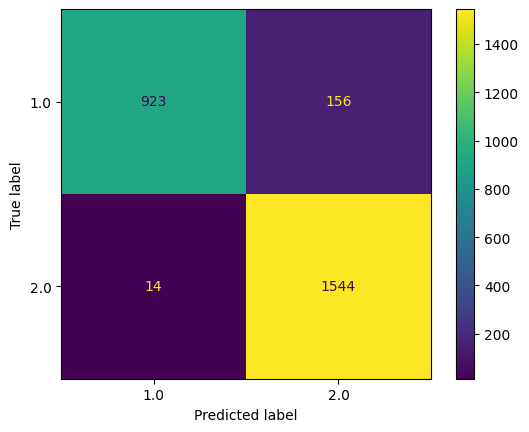

In [ ]:
#Матрица спутанности - правильность модели классификации
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = knn_n.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn_n.classes_).plot();

4) Нормализуйте данные двумя способами (например, примените StandardScaler и MinMaxScaler)

In [ ]:
#Нормализация с помощью StandartScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_n_StandartScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_n_StandartScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
#Нормализация с помощью MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n_MinMaxScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_n_MinMaxScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

5) Обучите ещё две модели на нормализованных данных. Оцените и сравнить полученные результаты между собой и с результатами без нормализации.

In [ ]:
#Обучение с StandartScaler
from sklearn.neighbors import KNeighborsClassifier
knn_n_StandartScaler = KNeighborsClassifier()
knn_n_StandartScaler.fit(X_train_n_StandartScaler, y_train)
knn_n_StandartScaler.score(X_test_n_StandartScaler, y_test)

0.8403488813045127

In [ ]:
#Обучение с MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
knn_n_MinMaxScaler = KNeighborsClassifier()
knn_n_MinMaxScaler.fit(X_train_n_MinMaxScaler, y_train)
knn_n_MinMaxScaler.score(X_test_n_MinMaxScaler, y_test)

0.8103905953735305

8.4) использовать методы уменьшения размерности

In [ ]:
#PCA для уменьшения размерности нецелевых признаков, для целевых признаков LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
scaler.fit(num_data)
X = pd.DataFrame(scaler.transform(num_data), columns = num_data.columns)

pca = PCA(n_components=4)
x_np = pca.fit_transform(X)
X = pd.DataFrame(x_np)
print(X)

le = LabelEncoder()
y = le.fit_transform(CLASS)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
knn_n = KNeighborsClassifier()
knn_n.fit(X_train, y_train)
knn_n.score(X_test, y_test)

             0         1         2         3
0    -0.133654 -6.208042  4.624118  0.831250
1    -0.190158 -5.799897  4.343991  0.865452
2     0.135851 -7.828136  5.951301  0.839894
3     0.745000 -1.688860  1.456928 -0.582483
4     0.250810 -1.684472  1.649935 -0.460797
...        ...       ...       ...       ...
8785  2.474030 -0.406247  4.731232  0.614139
8786 -0.928893  1.034857  0.292165 -1.147949
8787 -0.759500 -1.168698 -1.731922  2.031621
8788 -0.226105  0.799795  0.035932 -0.562136
8789 -1.247979  1.270654  0.142902 -0.748989

[8790 rows x 4 columns]
[0 0 0 ... 1 0 0]


0.7990140310959424

6) Подберите значения гиперпараметров (количество соседей и метрику расстояния) с помощью GridSearchCV.

<Axes: >

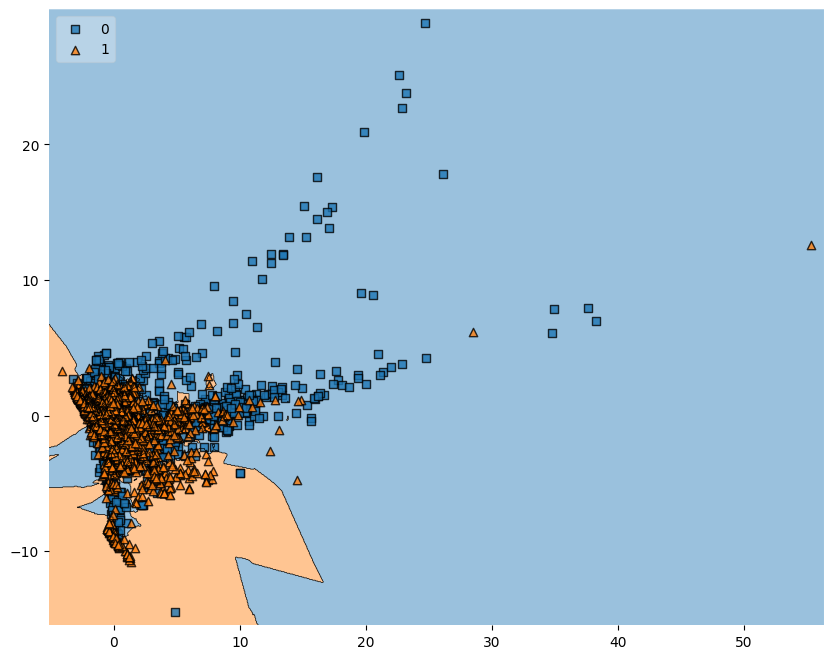

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_regions(x_np, y, clf=knn_n, legend=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
#Задаём диапазон значений соседей
k_range = list(range(1,20))
#Задаём значения гиперпараметров для перебора
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
#Обучение модели
grid_search = grid.fit(X_train, y_train)
#Лучшие значения параметров
print(grid_search.best_params_)
#Лучшее значение метрики
print(grid_search.best_score_)

Fitting 2 folds for each of 19 candidates, totalling 38 fits
{'n_neighbors': 5}
0.7931094432327098


7)Сделайте выводы об использовании (плюсах и минусах) метода k-ближайших соседей для классификации в целом и применительно к рассмотренному набору данных.

Преимущества: Простота, Интерпретируемость.

Недостатки: неэффективное расходование памяти, время выполнения, неустойчивость к погрешностям, отсутствие настраиваемых параметров(в исходном варианте)

8.1) оставить только по одному из сильно коррелирующих признаков

In [ ]:
corr_matrix = num_data.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool)) #Оставляем только по одному из сильно коррелирующих признаков
#Поиск индексов столбцов с корреляцией больше заданного порога
to_drop = [column for column in upper_triangle.columns if (any(upper_triangle[column] > 0.6))]
#Удаляем ненужные столбцы
num_data_copy1 = num_data
num_data_copy1 = num_data_copy1.drop(to_drop, axis = 1)

In [ ]:
#Разделим данные на тренировочные и тестовые, обучим KNN и посмотрим качество обучения.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_copy1, CLASS, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9393249905195298

Качество повысилось

8.2) объединить группу связанных по смыслу признаков в один (например, для витамина A)

Признаки можно объединить в следующие группу - основные питательные вещества


In [ ]:
num_data_copy2 = num_data
groups = {
    'Основные питательные вещества': ['Water_g', 'Energ_Kcal', 'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g', 'Sugar_Tot_g'],
    'Минералы': ['Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mg', 'Manganese_mg', 'Selenium_µg'],
    'Витамины': ['Vit_C_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Panto_Acid_mg', 'Vit_B6_mg', 'Folate_Tot_µg', 'Folic_Acid_µg', 'Food_Folate_µg', 'Folate_DFE_µg', 'Choline_Tot_mg', 'Vit_B12_µg', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_µg', 'Alpha_Carot_µg', 'Beta_Carot_µg', 'Beta_Crypt_µg', 'Lycopene_µg', 'Lut+Zea_µg', 'Vit_E_mg', 'Vit_D_µg', 'Vit_D_IU', 'Vit_K_µg'],
    'Жирные кислоты': ['FA_Sat_g', 'FA_Mono_g', 'FA_Poly_g'],
    'Другие признаки': ['Cholestrl_mg', 'GmWt_1', 'GmWt_2', 'Refuse_Pct']
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.melt(id_vars=['Shrt_Desc'], value_vars=['Water_g', 'Energ_Kcal', 'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g', 'Sugar_Tot_g'], var_name='Основные питательные вещества', value_name='Значение')

,Shrt_Desc,Основные питательные вещества,Значение
0,"BUTTER,WITH SALT",Water_g,15.87
1,"BUTTER,WHIPPED,W/ SALT",Water_g,16.72
2,"BUTTER OIL,ANHYDROUS",Water_g,0.24
3,"CHEESE,BLUE",Water_g,42.41
4,"CHEESE,BRICK",Water_g,41.11
...,...,...,...
70315,"MACKEREL,SALTED",Sugar_Tot_g,0.00
70316,"SCALLOP,(BAY&SEA),CKD,STMD",Sugar_Tot_g,0.00
70317,"SYRUP,CANE",Sugar_Tot_g,73.20
70318,"SNAIL,RAW",Sugar_Tot_g,0.00


8.3) повторно выбирать случайным образом поднабор из нескольких признаков и запоминать лучшие результаты (например, выбирать по 5 или по 7 признаков с помощью random.sample, повторять выбор 100 раз)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data, CLASS, test_size = 0.3, random_state = 42)

sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)
#Оценка важности признаков
importances = sel.feature_importances_
#Вывод наиболее важных признаков
important_features = X_train.columns[importances > 0.05]
print(important_features)

Index(['Vit_A_IU', 'Vit_A_RAE', 'Retinol_mg', 'Beta_Carot_mg'], dtype='object')


In [ ]:
importances

array([0.00521776, 0.00821224, 0.01056848, 0.00346321, 0.0035202 ,
       0.00912415, 0.00460633, 0.00942914, 0.0099711 , 0.00487906,
       0.00177649, 0.00276719, 0.00296076, 0.00329923, 0.00491208,
       0.00390804, 0.00435319, 0.0048918 , 0.04377547, 0.00240288,
       0.00478061, 0.00410293, 0.00240212, 0.00322315, 0.00298229,
       0.00038294, 0.00155726, 0.001691  , 0.00318944, 0.00399829,
       0.36997274, 0.20099539, 0.08574823, 0.01024992, 0.06556972,
       0.00288922, 0.00161678, 0.01427569, 0.00562642, 0.01686691,
       0.01919207, 0.00963469, 0.00455706, 0.00326303, 0.00418569,
       0.00415167, 0.00329562, 0.00139918, 0.00416115])

8.5) свой вариант отбора и подготовки признаков.

Выбор - градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(num_data, CLASS, test_size = 0.2, random_state = 42)

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9937428896473265


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50], 'max_depth': [3]}
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [ ]:
gb_best = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9931740614334471


Датасет 3

2) Первичный анализ

In [ ]:
data_v = pd.read_excel("ABBREV_with_CLASS.xlsx")

In [ ]:
numeric_v = [col for col in data_v.columns if data_v[col].dtypes in ['int64', 'float64']]
categorial_v = [col for col in data_v.columns if data_v[col].dtypes in ['object']]

num_data_v = data_v[numeric_v]
cat_data_v = data[categorial_v]

In [ ]:
num_data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Water_(g)          8789 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8465 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8196 non-null   float64
 9   Sugar_Tot_(g)      6958 non-null   float64
 10  Calcium_(mg)       8442 non-null   float64
 11  Iron_(mg)          8646 non-null   float64
 12  Magnesium_(mg)     8051 non-null   float64
 13  Phosphorus_(mg)    8211 non-null   float64
 14  Potassium_(mg)     8364 non-null   float64
 15  Sodium_(mg)        8707 non-null   float64
 16  Zinc_(mg)          8084 

In [ ]:
num_data_v.describe()

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct,CLASS
count,8790.000000,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,...,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000,8790.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,...,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416,5.715586
std,2537.598767,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,...,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471,5.076376
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000,0.000000
25%,2197.250000,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,...,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000,0.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,...,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000,10.000000
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,...,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000,10.000000
max,8789.000000,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,...,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000,11.000000


In [ ]:
cat_data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Shrt_Desc   8790 non-null   object
 1   GmWt_Desc1  8491 non-null   object
 2   GmWt_Desc2  4825 non-null   object
dtypes: object(3)
memory usage: 206.1+ KB


In [ ]:
cat_data_v.describe()

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",3 oz,1 cup
freq,2,1409,298


3) Придумайте способ осмысленного разбиения этих данных на несколько классов. Создайте новый столбец CLASS и поместите в него метки классов. Визуализируйте выполненное разбиение. Следующие действия выполняются над тремя версиями таблицы: а) ваш вариант б) разбиение одногруппника в) таблица с метками классов из файла в этом задании.

In [ ]:
data_v.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_µg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_µg', 'Food_Folate_(µg)':'Food_Folate_µg',
                       'Folate_DFE_(µg)':'Folate_DFE_µg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_µg', 'Vit_B12_(µg)':'Vit_B12_µg',
                       'Retinol_(µg)':'Retinol_µg', 'Alpha_Carot_(µg)':'Alpha_Carot_µg', 'Beta_Carot_(µg)':'Beta_Carot_µg', 'Vit_B12_(µg)':'Vit_B12_µg', 'Beta_Crypt_(µg)':'Beta_Crypt_µg',
                       'Lycopene_(µg)':'Lycopene_µg', 'Lut+Zea_ (µg)':'Lut+Zea_µg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_µg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg',
                       }, inplace = True )
num_data_v.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_mg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_mg', 'Food_Folate_(µg)':'Food_Folate_mg',
                       'Folate_DFE_(µg)':'Folate_DFE_mg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_mg', 'Vit_B12_(µg)':'Vit_B12_mg',
                       'Retinol_(µg)':'Retinol_mg', 'Alpha_Carot_(µg)':'Alpha_Carot_mg', 'Beta_Carot_(µg)':'Beta_Carot_mg', 'Vit_B12_(µg)':'Vit_B12_mg', 'Beta_Crypt_(µg)':'Beta_Crypt_mg',
                       'Lycopene_(µg)':'Lycopene_mg', 'Lut+Zea_ (µg)':'Lut_Zea_mg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_mg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg', 'Vit_D_µg' : 'Vit_D_mg',
                       }, inplace = True )

<ipython-input-90-6dec9dc33440>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data_v.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',


In [ ]:
num_data_v = num_data_v.drop(columns = 'NDB_No')

3.1) выполните минимальные необходимые манипуляции (обработайте категориальные признаки и пропуски)

In [ ]:
num_data_v.Water_g = num_data_v.Water_g.fillna(num_data_v.Water_g.median())
num_data_v.Ash_g = num_data_v.Ash_g.fillna(num_data_v.Ash_g.median())
num_data_v.Fiber_TD_g = num_data_v.Fiber_TD_g.fillna(num_data_v.Fiber_TD_g.median())
num_data_v.Sugar_Tot_g = num_data_v.Sugar_Tot_g.fillna(num_data_v.Sugar_Tot_g.median())
num_data_v.Calcium_mg = num_data_v.Calcium_mg.fillna(num_data_v.Calcium_mg.median())
num_data_v.Iron_mg = num_data_v.Iron_mg.fillna(num_data_v.Iron_mg.median())
num_data_v.Magnesium_mg = num_data_v.Magnesium_mg.fillna(num_data_v.Magnesium_mg.median())
num_data_v.Phosphorus_mg = num_data_v.Phosphorus_mg.fillna(num_data_v.Phosphorus_mg.median())
num_data_v.Potassium_mg = num_data_v.Potassium_mg.fillna(num_data_v.Potassium_mg.median())
num_data_v.Sodium_mg = num_data_v.Sodium_mg.fillna(num_data_v.Sodium_mg.median())
num_data_v.Zinc_mg = num_data_v.Zinc_mg.fillna(num_data_v.Zinc_mg.median())
num_data_v.Copper_mg = num_data_v.Copper_mg.fillna(num_data_v.Copper_mg.median())
num_data_v.Manganese_mg = num_data_v.Manganese_mg.fillna(num_data_v.Manganese_mg.median())
num_data_v.Selenium_mg = num_data_v.Selenium_mg.fillna(num_data_v.Selenium_mg.median())
num_data_v.Vit_C_mg = num_data_v.Vit_C_mg.fillna(num_data_v.Vit_C_mg.median())
num_data_v.Thiamin_mg = num_data_v.Thiamin_mg.fillna(num_data_v.Thiamin_mg.median())
num_data_v.Riboflavin_mg = num_data_v.Riboflavin_mg.fillna(num_data_v.Riboflavin_mg.median())
num_data_v.Niacin_mg = num_data_v.Niacin_mg.fillna(num_data_v.Niacin_mg.median())
num_data_v.Panto_Acid_mg = num_data_v.Panto_Acid_mg.fillna(num_data_v.Panto_Acid_mg.median())
num_data_v.Vit_B6_mg = num_data_v.Vit_B6_mg.fillna(num_data_v.Vit_B6_mg.median())
num_data_v.Folate_Tot_mg = num_data_v.Folate_Tot_mg.fillna(num_data_v.Folate_Tot_mg.median())
num_data_v.Folic_Acid_mg = num_data_v.Folic_Acid_mg.fillna(num_data_v.Folic_Acid_mg.median())
num_data_v.Food_Folate_mg = num_data_v.Food_Folate_mg.fillna(num_data_v.Food_Folate_mg.median())
num_data_v.Folate_DFE_mg = num_data_v.Folate_DFE_mg.fillna(num_data_v.Folate_DFE_mg.median())
num_data_v.Choline_Tot_mg = num_data_v.Choline_Tot_mg.fillna(num_data_v.Choline_Tot_mg.median())
num_data_v.Vit_B12_mg = num_data_v.Vit_B12_mg.fillna(num_data_v.Vit_B12_mg.median())
num_data_v.Vit_A_IU = num_data_v.Vit_A_IU.fillna(num_data_v.Vit_A_IU.median())
num_data_v.Vit_A_RAE = num_data_v.Vit_A_RAE.fillna(num_data_v.Vit_A_RAE.median())
num_data_v.Retinol_mg = num_data_v.Retinol_mg.fillna(num_data_v.Retinol_mg.median())
num_data_v.Alpha_Carot_mg = num_data_v.Alpha_Carot_mg.fillna(num_data_v.Alpha_Carot_mg.median())
num_data_v.Beta_Carot_mg = num_data_v.Beta_Carot_mg.fillna(num_data_v.Beta_Carot_mg.median())
num_data_v.Beta_Crypt_mg = num_data_v.Beta_Crypt_mg.fillna(num_data_v.Beta_Crypt_mg.median())
num_data_v.Lycopene_mg = num_data_v.Lycopene_mg.fillna(num_data_v.Lycopene_mg.median())
num_data_v.Lut_Zea_mg = num_data_v.Lut_Zea_mg.fillna(num_data_v.Lut_Zea_mg.median())
num_data_v.Vit_E_mg = num_data_v.Vit_E_mg.fillna(num_data_v.Vit_E_mg.median())
num_data_v.Vit_D_mg = num_data_v.Vit_D_mg.fillna(num_data_v.Vit_D_mg.median())
num_data_v.Vit_D_IU = num_data_v.Vit_D_IU.fillna(num_data_v.Vit_D_IU.median())
num_data_v.Vit_K_mg = num_data_v.Vit_K_mg.fillna(num_data_v.Vit_K_mg.median())
num_data_v.FA_Sat_g = num_data_v.FA_Sat_g.fillna(num_data_v.FA_Sat_g.median())
num_data_v.FA_Mono_g = num_data_v.FA_Mono_g.fillna(num_data_v.FA_Mono_g.median())
num_data_v.FA_Poly_g = num_data_v.FA_Poly_g.fillna(num_data_v.FA_Poly_g.median())
num_data_v.Cholestrl_mg = num_data_v.Cholestrl_mg.fillna(num_data_v.Cholestrl_mg.median())
num_data_v.GmWt_1 = num_data_v.GmWt_1.fillna(num_data_v.GmWt_1.median())
num_data_v.GmWt_2 = num_data_v.GmWt_2.fillna(num_data_v.GmWt_2.median())
num_data_v.Refuse_Pct = num_data_v.Refuse_Pct.fillna(num_data_v.Refuse_Pct.median())

<Axes: xlabel='CLASS', ylabel='count'>

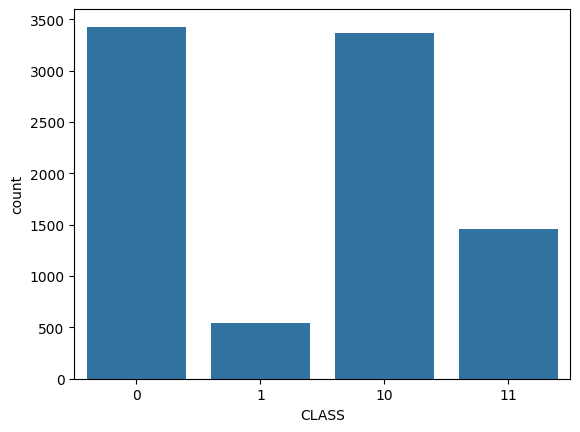

In [ ]:
sns.countplot(x = num_data_v['CLASS'])

3.2) отделите столбец с меткой CLASS (Третий датасет)

In [ ]:
CLASS = num_data_v['CLASS'].squeeze()
num_data_v = num_data_v.drop(['CLASS'], axis = 1)

3.3) разбейте данные на тренировочный и тестовый наборы. (Третий датасет)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_v, CLASS, test_size = 0.3, random_state = 42)

4) Обучите классификатор KNeighborsClassifier на тренировочном наборе.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_nv = KNeighborsClassifier()
knn_nv.fit(X_train, y_train)
knn_nv.score(X_test, y_test)

0.8050815320439894

5) Используйте обученную модель на тестовых данных, оцените полученные результаты. Используйте визуализацию и несколько метрик.

In [ ]:
#Тренировочный рабор
from sklearn.metrics import classification_report
y_pred = knn_nv.predict(X_train)

In [ ]:
#Тестовый набор
y_pred = knn_nv.predict(X_test)

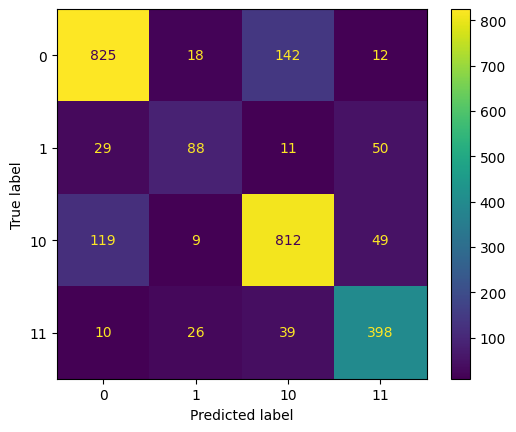

In [ ]:
#Матрица спутанности - правильность модели классификации
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = knn_nv.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn_nv.classes_).plot();

6) Нормализуйте данные двумя способами (например, примените StandardScaler и MinMaxScaler).

In [ ]:
#Нормализация с помощью StandartScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nv_StandartScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_nv_StandartScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
#Нормализация с помощью MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_nv_MinMaxScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_nv_MinMaxScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

7) Обучите ещё две модели на нормализованных данных. Оцените и сравнить полученные результаты между собой и с результатами без нормализации.

In [ ]:
#Обучение на норм. данных с помощью StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn_nv_StandardScaler = KNeighborsClassifier()
knn_nv_StandardScaler.fit(X_train_nv_StandartScaler, y_train)
knn_nv_StandardScaler.score(X_test_nv_StandartScaler, y_test)

0.8532423208191127

In [ ]:
#Обучение на норм. данных с помощью MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
knn_nv_MinMaxScaler = KNeighborsClassifier()
knn_nv_MinMaxScaler.fit(X_train_nv_MinMaxScaler, y_train)
knn_nv_MinMaxScaler.score(X_test_nv_MinMaxScaler, y_test)

0.8627227910504361

10.4) использовать методы уменьшения размерности (например, PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
scaler.fit(num_data_v)
X = pd.DataFrame(scaler.transform(num_data_v), columns = num_data_v.columns)

pca = PCA(n_components=2)
x_np = pca.fit_transform(X)
X = pd.DataFrame(x_np)
print(X)

le = LabelEncoder()
y = le.fit_transform(CLASS) #Целевой признак - класс, в котором распределена еда по содержанию витаминов
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
knn_nv = KNeighborsClassifier()
knn_nv.fit(X_train, y_train)
knn_nv.score(X_test, y_test)

             0         1
0    -0.135968 -6.045634
1    -0.192470 -5.642618
2     0.133613 -7.650679
3     0.742543 -1.572485
4     0.248366 -1.568034
...        ...       ...
8785  2.476239 -0.453473
8786 -0.926407  0.927190
8787 -0.756638 -1.296165
8788 -0.223667  0.697266
8789 -1.245558  1.166317

[8790 rows x 2 columns]
[2 2 0 ... 2 0 0]


0.689419795221843

8) Подберите значения гиперпараметров (количество соседей и метрику расстояния) с помощью GridSearchCV.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

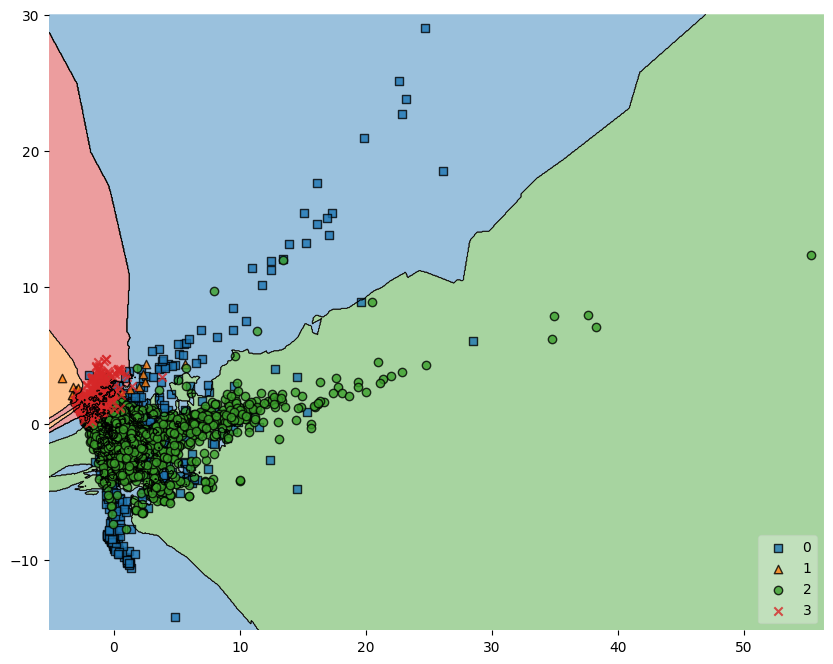

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_regions(x_np, y, clf=knn_nv, legend=4)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1,20))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 2 folds for each of 19 candidates, totalling 38 fits
{'n_neighbors': 17}
0.7118474224425273


10.1) оставить только по одному из сильно коррелирующих признаков

In [ ]:
#Удалим из таблицы лишние сильно коррелирующие признаки и посмотрим что будет.
corr_matrix = num_data_v.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
to_drop = [column for column in upper_triangle.columns if (any(upper_triangle[column] > 0.6))]
#Удаляем ненужные столбцы
num_data_v_copy1 = num_data_v
num_data_v_copy1 = num_data_v_copy1.drop(to_drop, axis = 1)

In [ ]:
#Разделим данные на тренировочные и тестовые, обучим KNN и посмотрим качество обучения.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_v_copy1, CLASS, test_size = 0.3, random_state = 42)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7785362153962837

Качество ухудшилось

10.2) объединить группу связанных по смыслу признаков в один (например, для витамина A)

Объединение - основные питательные вещества

In [ ]:
num_data_v_copy2 = num_data_v

In [ ]:
groups = {
    'Основные питательные вещества': ['Water_g', 'Energ_Kcal', 'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g', 'Sugar_Tot_g'],
    'Минералы': ['Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mg', 'Manganese_mg', 'Selenium_µg'],
    'Витамины': ['Vit_C_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Panto_Acid_mg', 'Vit_B6_mg', 'Folate_Tot_µg', 'Folic_Acid_µg', 'Food_Folate_µg', 'Folate_DFE_µg', 'Choline_Tot_mg', 'Vit_B12_µg', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_µg', 'Alpha_Carot_µg', 'Beta_Carot_µg', 'Beta_Crypt_µg', 'Lycopene_µg', 'Lut+Zea_µg', 'Vit_E_mg', 'Vit_D_µg', 'Vit_D_IU', 'Vit_K_µg'],
    'Жирные кислоты': ['FA_Sat_g', 'FA_Mono_g', 'FA_Poly_g'],
    'Другие признаки': ['Cholestrl_mg', 'GmWt_1', 'GmWt_2', 'Refuse_Pct']
}

In [ ]:
df = pd.DataFrame(data_v)

In [ ]:
df.melt(id_vars=['Shrt_Desc'], value_vars=['Water_g', 'Energ_Kcal', 'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g', 'Sugar_Tot_g'], var_name='Основные питательные вещества', value_name='Значение')

,Shrt_Desc,Основные питательные вещества,Значение
0,"BUTTER,WITH SALT",Water_g,15.87
1,"BUTTER,WHIPPED,W/ SALT",Water_g,16.72
2,"BUTTER OIL,ANHYDROUS",Water_g,0.24
3,"CHEESE,BLUE",Water_g,42.41
4,"CHEESE,BRICK",Water_g,41.11
...,...,...,...
70315,"MACKEREL,SALTED",Sugar_Tot_g,0.00
70316,"SCALLOP,(BAY&SEA),CKD,STMD",Sugar_Tot_g,0.00
70317,"SYRUP,CANE",Sugar_Tot_g,73.20
70318,"SNAIL,RAW",Sugar_Tot_g,0.00


10.3) повторно выбирать случайным образом поднабор из нескольких признаков и запоминать лучшие результаты (например, выбирать по 5 или по 7 признаков с помощью random.sample, повторять выбор 100 раз)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_v, CLASS, test_size = 0.3, random_state = 42)

sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)
#Оценка важности признаков
importances = sel.feature_importances_
#Вывод наиболее важных признаков
important_features = X_train.columns[importances > 0.05]
print(important_features)

Index(['Water_g', 'Energ_Kcal', 'Carbohydrt_g', 'Sugar_Tot_g', 'Cholestrl_mg'], dtype='object')


In [ ]:
importances

array([0.0136275 , 0.13562245, 0.07431547, 0.0431384 , 0.01909378,
       0.01423567, 0.09692822, 0.03189261, 0.2087749 , 0.01076268,
       0.00768471, 0.00544452, 0.01481366, 0.00540651, 0.0255409 ,
       0.00657098, 0.00431081, 0.01222757, 0.00773534, 0.00316464,
       0.00793405, 0.00466822, 0.00746905, 0.00551689, 0.00520628,
       0.00595951, 0.00116939, 0.00424573, 0.00642078, 0.02025332,
       0.00934163, 0.00409577, 0.00352444, 0.00215234, 0.00095078,
       0.01375833, 0.00136556, 0.00031473, 0.02001852, 0.0164226 ,
       0.00176751, 0.00218804, 0.01440602, 0.01227887, 0.00835137,
       0.00907385, 0.05122334, 0.00668673, 0.00473476, 0.00721026])

10.5) свой вариант отбора и подготовки признаков.

Выбран градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(num_data_v, CLASS, test_size = 0.2, random_state = 42)

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb.predict(X_test) #Оцениваем качество модели на тестовой выборке
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50], 'max_depth': [3]}
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [ ]:
gb_best = GradientBoostingClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, random_state = 42)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Датасет 2 - разбиение по минералам

2) Изучите полученный набор данных

In [ ]:
data_svoy2 = pd.read_excel("ABBREV.xlsx")

In [ ]:
numeric = [col for col in data_svoy2.columns if data_svoy2[col].dtypes in ['int64', 'float64']]
categorial = [col for col in data_svoy2.columns if data_svoy2[col].dtypes in ['object']]

num_data_svoy2 = data_svoy2[numeric]
cat_data_svoy2 = data_svoy2[categorial]

In [ ]:
num_data_svoy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [ ]:
cat_data_svoy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Shrt_Desc   8790 non-null   object
 1   GmWt_Desc1  8491 non-null   object
 2   GmWt_Desc2  4825 non-null   object
dtypes: object(3)
memory usage: 206.1+ KB


In [ ]:
num_data_svoy2.describe()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000
mean,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416
std,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000
50%,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000
75%,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000
max,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


In [ ]:
cat_data_svoy2.describe()

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
count,8790,8491,4825
unique,8787,911,921
top,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...",3 oz,1 cup
freq,2,1409,298


3) Придумайте способ осмысленного разбиения этих данных на несколько классов. Создайте новый столбец CLASS и поместите в него метки классов. Визуализируйте выполненное разбиение. Следующие действия выполняются над тремя версиями таблицы: а) ваш вариант б) разбиение одногруппника в) таблица с метками классов из файла в этом задании.

In [ ]:
data_svoy2.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_µg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_µg', 'Food_Folate_(µg)':'Food_Folate_µg',
                       'Folate_DFE_(µg)':'Folate_DFE_µg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_µg', 'Vit_B12_(µg)':'Vit_B12_µg',
                       'Retinol_(µg)':'Retinol_µg', 'Alpha_Carot_(µg)':'Alpha_Carot_µg', 'Beta_Carot_(µg)':'Beta_Carot_µg', 'Vit_B12_(µg)':'Vit_B12_µg', 'Beta_Crypt_(µg)':'Beta_Crypt_µg',
                       'Lycopene_(µg)':'Lycopene_µg', 'Lut+Zea_ (µg)':'Lut+Zea_µg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_µg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg',
                       }, inplace = True )
num_data_svoy2.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',
                       'Sugar_Tot_(g)':'Sugar_Tot_g', 'Calcium_(mg)':'Calcium_mg', 'Iron_(mg)':'Iron_mg', 'Magnesium_(mg)':'Magnesium_mg', 'Phosphorus_(mg)':'Phosphorus_mg',
                       'Potassium_(mg)':'Potassium_mg', 'Sodium_(mg)':'Sodium_mg', 'Zinc_(mg)':'Zinc_mg', 'Copper_mg)':'Copper_mg', 'Manganese_(mg)':'Manganese_mg',
                       'Selenium_(µg)':'Selenium_mg', 'Vit_C_(mg)':'Vit_C_mg', 'Thiamin_(mg)':'Thiamin_mg', 'Riboflavin_(mg)':'Riboflavin_mg', 'Niacin_(mg)':'Niacin_mg',
                       'Panto_Acid_mg)':'Panto_Acid_mg', 'Vit_B6_(mg)':'Vit_B6_mg', 'Folate_Tot_(µg)':'Folate_Tot_mg', 'Food_Folate_(µg)':'Food_Folate_mg',
                       'Folate_DFE_(µg)':'Folate_DFE_mg', 'Choline_Tot_ (mg)':'Choline_Tot_mg', 'Folic_Acid_(µg)':'Folic_Acid_mg', 'Vit_B12_(µg)':'Vit_B12_mg',
                       'Retinol_(µg)':'Retinol_mg', 'Alpha_Carot_(µg)':'Alpha_Carot_mg', 'Beta_Carot_(µg)':'Beta_Carot_mg', 'Vit_B12_(µg)':'Vit_B12_mg', 'Beta_Crypt_(µg)':'Beta_Crypt_mg',
                       'Lycopene_(µg)':'Lycopene_mg', 'Lut+Zea_ (µg)':'Lut_Zea_mg', 'Vit_E_(mg)':'Vit_E_mg', 'Vit_K_(µg)':'Vit_K_mg','FA_Sat_(g)':'FA_Sat_g',
                       'FA_Mono_(g)':'FA_Mono_g', 'FA_Poly_(g)':'FA_Poly_g', 'Cholestrl_(mg)':'Cholestrl_mg', 'Vit_D_µg' : 'Vit_D_mg',
                       }, inplace = True )

<ipython-input-128-df09da038d3b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data_svoy2.rename(columns = {'Water_(g)':'Water_g', 'Protein_(g)':'Protein_g', 'Lipid_Tot_(g)':'Lipid_Tot_g', 'Ash_(g)':'Ash_g', 'Carbohydrt_(g)':'Carbohydrt_g', 'Fiber_TD_(g)':'Fiber_TD_g',


In [ ]:
num_data_svoy2 = num_data_svoy2.drop(columns = ['NDB_No'])

3.1) выполните минимальные необходимые манипуляции (обработайте категориальные признаки и пропуски) (Первый датасет)

In [ ]:
num_data_svoy2.Water_g = num_data_svoy2.Water_g.fillna(num_data_svoy2.Water_g.median())
num_data_svoy2.Ash_g = num_data_svoy2.Ash_g.fillna(num_data_svoy2.Ash_g.median())
num_data_svoy2.Fiber_TD_g = num_data_svoy2.Fiber_TD_g.fillna(num_data_svoy2.Fiber_TD_g.median())
num_data_svoy2.Sugar_Tot_g = num_data_svoy2.Sugar_Tot_g.fillna(num_data_svoy2.Sugar_Tot_g.median())
num_data_svoy2.Calcium_mg = num_data_svoy2.Calcium_mg.fillna(num_data_svoy2.Calcium_mg.median())
num_data_svoy2.Iron_mg = num_data_svoy2.Iron_mg.fillna(num_data_svoy2.Iron_mg.median())
num_data_svoy2.Magnesium_mg = num_data_svoy2.Magnesium_mg.fillna(num_data_svoy2.Magnesium_mg.median())
num_data_svoy2.Phosphorus_mg = num_data_svoy2.Phosphorus_mg.fillna(num_data_svoy2.Phosphorus_mg.median())
num_data_svoy2.Potassium_mg = num_data_svoy2.Potassium_mg.fillna(num_data_svoy2.Potassium_mg.median())
num_data_svoy2.Sodium_mg = num_data_svoy2.Sodium_mg.fillna(num_data_svoy2.Sodium_mg.median())
num_data_svoy2.Zinc_mg = num_data_svoy2.Zinc_mg.fillna(num_data_svoy2.Zinc_mg.median())
num_data_svoy2.Copper_mg = num_data_svoy2.Copper_mg.fillna(num_data_svoy2.Copper_mg.median())
num_data_svoy2.Manganese_mg = num_data_svoy2.Manganese_mg.fillna(num_data_svoy2.Manganese_mg.median())
num_data_svoy2.Selenium_mg = num_data_svoy2.Selenium_mg.fillna(num_data_svoy2.Selenium_mg.median())
num_data_svoy2.Vit_C_mg = num_data_svoy2.Vit_C_mg.fillna(num_data_svoy2.Vit_C_mg.median())
num_data_svoy2.Thiamin_mg = num_data_svoy2.Thiamin_mg.fillna(num_data_svoy2.Thiamin_mg.median())
num_data_svoy2.Riboflavin_mg = num_data_svoy2.Riboflavin_mg.fillna(num_data_svoy2.Riboflavin_mg.median())
num_data_svoy2.Niacin_mg = num_data_svoy2.Niacin_mg.fillna(num_data_svoy2.Niacin_mg.median())
num_data_svoy2.Panto_Acid_mg = num_data_svoy2.Panto_Acid_mg.fillna(num_data_svoy2.Panto_Acid_mg.median())
num_data_svoy2.Vit_B6_mg = num_data_svoy2.Vit_B6_mg.fillna(num_data_svoy2.Vit_B6_mg.median())
num_data_svoy2.Folate_Tot_mg = num_data_svoy2.Folate_Tot_mg.fillna(num_data_svoy2.Folate_Tot_mg.median())
num_data_svoy2.Folic_Acid_mg = num_data_svoy2.Folic_Acid_mg.fillna(num_data_svoy2.Folic_Acid_mg.median())
num_data_svoy2.Food_Folate_mg = num_data_svoy2.Food_Folate_mg.fillna(num_data_svoy2.Food_Folate_mg.median())
num_data_svoy2.Folate_DFE_mg = num_data_svoy2.Folate_DFE_mg.fillna(num_data_svoy2.Folate_DFE_mg.median())
num_data_svoy2.Choline_Tot_mg = num_data_svoy2.Choline_Tot_mg.fillna(num_data_svoy2.Choline_Tot_mg.median())
num_data_svoy2.Vit_B12_mg = num_data_svoy2.Vit_B12_mg.fillna(num_data_svoy2.Vit_B12_mg.median())
num_data_svoy2.Vit_A_IU = num_data_svoy2.Vit_A_IU.fillna(num_data_svoy2.Vit_A_IU.median())
num_data_svoy2.Vit_A_RAE = num_data_svoy2.Vit_A_RAE.fillna(num_data_svoy2.Vit_A_RAE.median())
num_data_svoy2.Retinol_mg = num_data_svoy2.Retinol_mg.fillna(num_data_svoy2.Retinol_mg.median())
num_data_svoy2.Alpha_Carot_mg = num_data_svoy2.Alpha_Carot_mg.fillna(num_data_svoy2.Alpha_Carot_mg.median())
num_data_svoy2.Beta_Carot_mg = num_data_svoy2.Beta_Carot_mg.fillna(num_data_svoy2.Beta_Carot_mg.median())
num_data_svoy2.Beta_Crypt_mg = num_data_svoy2.Beta_Crypt_mg.fillna(num_data_svoy2.Beta_Crypt_mg.median())
num_data_svoy2.Lycopene_mg = num_data_svoy2.Lycopene_mg.fillna(num_data_svoy2.Lycopene_mg.median())
num_data_svoy2.Lut_Zea_mg = num_data_svoy2.Lut_Zea_mg.fillna(num_data_svoy2.Lut_Zea_mg.median())
num_data_svoy2.Vit_E_mg = num_data_svoy2.Vit_E_mg.fillna(num_data_svoy2.Vit_E_mg.median())
num_data_svoy2.Vit_D_mg = num_data_svoy2.Vit_D_mg.fillna(num_data_svoy2.Vit_D_mg.median())
num_data_svoy2.Vit_D_IU = num_data_svoy2.Vit_D_IU.fillna(num_data_svoy2.Vit_D_IU.median())
num_data_svoy2.Vit_K_mg = num_data_svoy2.Vit_K_mg.fillna(num_data_svoy2.Vit_K_mg.median())
num_data_svoy2.FA_Sat_g = num_data_svoy2.FA_Sat_g.fillna(num_data_svoy2.FA_Sat_g.median())
num_data_svoy2.FA_Mono_g = num_data_svoy2.FA_Mono_g.fillna(num_data_svoy2.FA_Mono_g.median())
num_data_svoy2.FA_Poly_g = num_data_svoy2.FA_Poly_g.fillna(num_data_svoy2.FA_Poly_g.median())
num_data_svoy2.Cholestrl_mg = num_data_svoy2.Cholestrl_mg.fillna(num_data_svoy2.Cholestrl_mg.median())
num_data_svoy2.GmWt_1 = num_data_svoy2.GmWt_1.fillna(num_data_svoy2.GmWt_1.median())
num_data_svoy2.GmWt_2 = num_data_svoy2.GmWt_2.fillna(num_data_svoy2.GmWt_2.median())
num_data_svoy2.Refuse_Pct = num_data_svoy2.Refuse_Pct.fillna(num_data_svoy2.Refuse_Pct.median())

In [ ]:
groups = {
    'Минералы': ['Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mg', 'Manganese_mg', 'Selenium_mg'],
}

In [ ]:
# Среднее значение считалось вручную по сумме средних значений каждого вида витамина
srz = (74.531513 + 2.678055 + 34.094084 + 163.815358 + 277.050853 + 310.376109 + 2.026884 + 0.180828 + 0.516575 + 14.529044) // 10

In [ ]:
for i, row in num_data_svoy2.iterrows():
  if row['Calcium_mg'] + row['Iron_mg'] + row['Magnesium_mg'] + row['Phosphorus_mg'] + row['Potassium_mg'] + row['Sodium_mg'] + row['Zinc_mg'] + row['Copper_mg'] + row['Manganese_mg'] + row['Selenium_mg'] > srz:
    num_data_svoy2.at[i, 'CLASS'] = 1
  else:
    num_data_svoy2.at[i, 'CLASS'] = 2

<Axes: xlabel='CLASS', ylabel='count'>

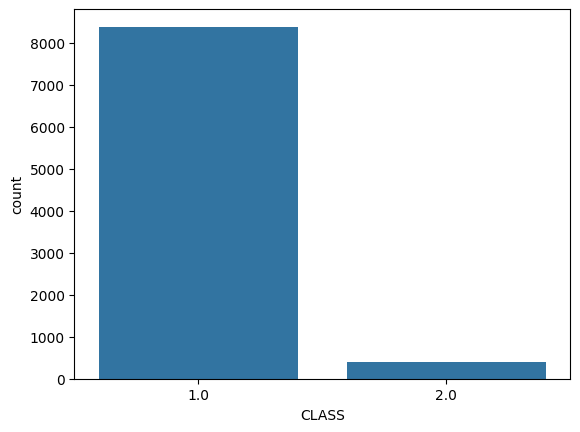

In [ ]:
sns.countplot(x = num_data_svoy2['CLASS'])

3.2) отделите столбец с меткой CLASS(Второй датасет)

In [ ]:
CLASS = num_data_svoy2['CLASS'].squeeze()
num_data_svoy2 = num_data_svoy2.drop(['CLASS'], axis = 1)

3.3) разбейте данные на тренировочный и тестовый наборыю (Второй датасет)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_svoy2, CLASS, test_size = 0.3, random_state = 42)

4) Обучите классификатор KneighborsClassifier На тренировочном наборе.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_svoy2 = KNeighborsClassifier()
knn_svoy2.fit(X_train, y_train)
knn_svoy2.score(X_test, y_test)

0.9882442169131589

5) Используйте обученную модель на тестовых данных, оцените полученные результаты. Используйте визуализацию и несколько метрик. (Второй датасет)

In [ ]:
#Тренировочный набор
from sklearn.metrics import classification_report
y_pred = knn_svoy2.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      5883
         2.0       0.92      0.88      0.90       270

    accuracy                           0.99      6153
   macro avg       0.95      0.94      0.95      6153
weighted avg       0.99      0.99      0.99      6153



In [ ]:
#Тестовый набор
y_pred = knn_svoy2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      2505
         2.0       0.92      0.84      0.88       132

    accuracy                           0.99      2637
   macro avg       0.95      0.92      0.94      2637
weighted avg       0.99      0.99      0.99      2637



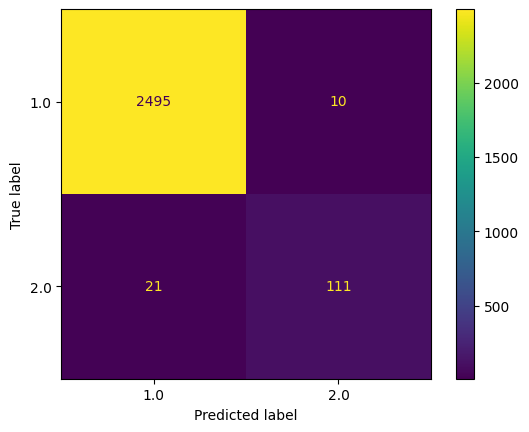

In [ ]:
#Матрица спутанности - правильность модели классификации
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = knn_svoy2.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_svoy2.classes_).plot();

6) Нормализуйте данные двумя способами (например, примините StandardScaler и MinMaxScaler)

In [ ]:
#Нормализация с помощью StandartScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_n_StandartScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_n_StandartScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
#Нормализация с помощью MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n_MinMaxScaler = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_n_MinMaxScaler = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

7) Обучите ещё две модели на нормализованных данных. Оцените и сравнить полученные результаты между собой и с результатами без нормализации.

In [ ]:
#Обучение на норм. данных с помощью StandartScaler
from sklearn.neighbors import KNeighborsClassifier
knn_n_StandartScaler = KNeighborsClassifier()
knn_n_StandartScaler.fit(X_train_n_StandartScaler, y_train)
knn_n_StandartScaler.score(X_test_n_StandartScaler, y_test)

0.9783845278725825

In [ ]:
#Обучение на норм. данных с помощью MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
knn_n_MinMaxScaler = KNeighborsClassifier()
knn_n_MinMaxScaler.fit(X_train_n_MinMaxScaler, y_train)
knn_n_MinMaxScaler.score(X_test_n_MinMaxScaler, y_test)

0.9768676526355707

10.4) использовать методы уменьшения размерности

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
scaler.fit(num_data_svoy2)
X = pd.DataFrame(scaler.transform(num_data_svoy2), columns = num_data_svoy2.columns)

pca = PCA(n_components=2)
x_np = pca.fit_transform(X)
X = pd.DataFrame(x_np)
print(X)

le = LabelEncoder()
y = le.fit_transform(CLASS)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
knn_n = KNeighborsClassifier()
knn_n.fit(X_train, y_train)
knn_n.score(X_test, y_test)

             0         1
0    -0.133654 -6.208109
1    -0.190158 -5.799965
2     0.135852 -7.828186
3     0.744999 -1.688959
4     0.250810 -1.684575
...        ...       ...
8785  2.474027 -0.406207
8786 -0.928894  1.034827
8787 -0.759501 -1.168800
8788 -0.226106  0.799815
8789 -1.247980  1.270605

[8790 rows x 2 columns]
[0 0 1 ... 0 0 0]


0.9704209328782708

8) Подберите значения гиперпараметров (количество соседей и метрику расстояния) с помощью GridSearchCV.

<Axes: >

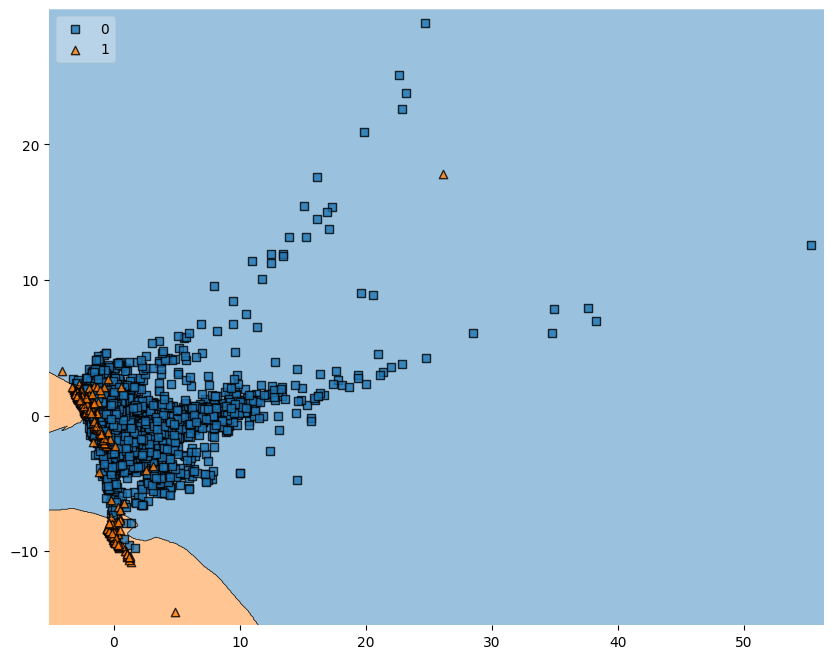

In [ ]:
#Визуализация knn
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_regions(x_np, y, clf=knn_n, legend=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1,20))
#Задаём значения гиперпараметров для перебора
param_grid = dict(n_neighbors = k_range)
#Создание модели GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, y_train)
#Лучшие значения параметров
print(grid_search.best_params_)
#Лучшее значение метрики
print(grid_search.best_score_)

Fitting 2 folds for each of 19 candidates, totalling 38 fits
{'n_neighbors': 18}
0.977571757064981


10.1) оставить только по одному из сильно коррелирующих признаков

In [ ]:
#Удалим из таблицы лишние сильно коррелирующие признаки и посмотрим что будет.
corr_matrix = num_data_svoy2.corr().abs()
#Выбор верхнего треугольника матрицы (без повторений)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool)) #Оставляем только по одному из сильно коррелирующих признаков
#Поиск индексов столбцов с корреляцией больше заданного порога
to_drop = [column for column in upper_triangle.columns if (any(upper_triangle[column] > 0.6))]
#Удаляем ненужные столбцы
num_data_copy1 = num_data_svoy2
num_data_copy1 = num_data_copy1.drop(to_drop, axis = 1)

In [ ]:
#Разделим данные на тренировочные и тестовые, обучим KNN и посмотрим качество обучения.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_copy1, CLASS, test_size = 0.3, random_state = 42)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9825559347743648

10.2) объединить группу связанных по смыслу признаков в один (например, для витамина A)

In [ ]:
groups = {
    'Основные питательные вещества': ['Water_g', 'Energ_Kcal', 'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g', 'Sugar_Tot_g'],
    'Минералы': ['Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mg', 'Manganese_mg', 'Selenium_µg'],
    'Витамины': ['Vit_C_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Panto_Acid_mg', 'Vit_B6_mg', 'Folate_Tot_µg', 'Folic_Acid_µg', 'Food_Folate_µg', 'Folate_DFE_µg', 'Choline_Tot_mg', 'Vit_B12_µg', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_µg', 'Alpha_Carot_µg', 'Beta_Carot_µg', 'Beta_Crypt_µg', 'Lycopene_µg', 'Lut+Zea_µg', 'Vit_E_mg', 'Vit_D_µg', 'Vit_D_IU', 'Vit_K_µg'],
    'Жирные кислоты': ['FA_Sat_g', 'FA_Mono_g', 'FA_Poly_g'],
    'Другие признаки': ['Cholestrl_mg', 'GmWt_1', 'GmWt_2', 'Refuse_Pct']
}

In [ ]:
df = pd.DataFrame(data_svoy2)

In [ ]:
df.melt(id_vars=['Shrt_Desc'], value_vars=['Vit_C_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'Panto_Acid_mg', 'Vit_B6_mg', 'Folate_Tot_µg', 'Folic_Acid_µg', 'Food_Folate_µg', 'Folate_DFE_µg', 'Choline_Tot_mg', 'Vit_B12_µg', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_µg', 'Alpha_Carot_µg', 'Beta_Carot_µg', 'Beta_Crypt_µg', 'Lycopene_µg', 'Lut+Zea_µg', 'Vit_E_mg', 'Vit_D_µg', 'Vit_D_IU', 'Vit_K_µg'], var_name='Минералы', value_name='Значение')

,Shrt_Desc,Минералы,Значение
0,"BUTTER,WITH SALT",Vit_C_mg,0.0
1,"BUTTER,WHIPPED,W/ SALT",Vit_C_mg,0.0
2,"BUTTER OIL,ANHYDROUS",Vit_C_mg,0.0
3,"CHEESE,BLUE",Vit_C_mg,0.0
4,"CHEESE,BRICK",Vit_C_mg,0.0
...,...,...,...
210955,"MACKEREL,SALTED",Vit_K_µg,7.8
210956,"SCALLOP,(BAY&SEA),CKD,STMD",Vit_K_µg,0.0
210957,"SYRUP,CANE",Vit_K_µg,0.0
210958,"SNAIL,RAW",Vit_K_µg,0.1


10.3) повторно выбирать случайным образом поднабор из нескольких признаков и запоминать лучшие результаты (например, выбирать по 5 или по 7 признаков с помощью random.sample, повторять выбор 100 раз)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_data_svoy2, CLASS, test_size = 0.3, random_state = 42)

sel = RandomForestClassifier(n_estimators = 100)
sel.fit(X_train, y_train)
#Оценка важности признаков
importances = sel.feature_importances_
#Вывод наиболее важных признаков
important_features = X_train.columns[importances > 0.05]
print(important_features)

Index(['Ash_g', 'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg',
       'Zinc_mg'],
      dtype='object')


In [ ]:
importances

array([1.25674304e-02, 1.52406212e-02, 4.79229300e-02, 7.86535298e-03,
       2.05734375e-01, 5.69228792e-03, 3.18918175e-03, 5.68879230e-03,
       2.05290661e-02, 2.50050029e-02, 5.72692966e-02, 1.10042516e-01,
       1.37197959e-01, 5.97524900e-02, 5.63502918e-02, 1.42450025e-02,
       4.54562335e-03, 1.54605615e-02, 2.83132861e-03, 2.77105611e-02,
       2.39678647e-02, 2.17930006e-02, 1.19648194e-02, 9.80845369e-03,
       1.83892616e-03, 5.27797814e-04, 3.84678377e-03, 6.52417834e-03,
       2.14863340e-02, 3.62842534e-03, 4.92727116e-03, 4.04048655e-03,
       9.14579700e-04, 6.88571653e-04, 1.89826713e-03, 1.64364277e-03,
       6.34506984e-05, 2.04651932e-03, 2.67088544e-03, 7.67815565e-04,
       3.75841768e-04, 2.78867859e-03, 9.39525185e-03, 7.15872152e-03,
       5.52180004e-03, 5.79182649e-04, 8.06346353e-03, 5.86535000e-03,
       3.62965445e-04])

10.5) свой вариант отбора и подготовки признаков.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(num_data_svoy2, CLASS, test_size = 0.2, random_state = 42)

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9965870307167235


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50], 'max_depth': [3]}
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [ ]:
gb_best = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9965870307167235
